In [2]:
import pandas as pd
import requests
import io

# download csv from git to my mac
'''
url = "https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv"
download = requests.get(url).content

test_df = pd.read_csv(io.StringIO(download.decode('utf-8')))
print(test_df.head())
test_df.to_csv('oxford_strigency.csv')
'''

'\nurl = "https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv"\ndownload = requests.get(url).content\n\ntest_df = pd.read_csv(io.StringIO(download.decode(\'utf-8\')))\nprint(test_df.head())\ntest_df.to_csv(\'oxford_strigency.csv\')\n'

In [3]:
from mysql.connector import MySQLConnection, Error
import pandas as pd
from sqlalchemy import create_engine 
import pymysql

from connection_config import read_db_config

In [4]:
conn_string,ssl_args = read_db_config('teama.teama')
engine = create_engine(conn_string,connect_args=ssl_args)

Upload oxford strigency data

In [5]:
# oxford_stringency_df = pd.read_csv('/Users/Nina/Documents/GitHub/Big-Data-Challenge-Team-A/oxford_strigency.csv',header = 0)
# oxford_stringency_df.to_sql('oxford_stringency_raw',con = engine,if_exists = 'fail')

Upload diesel and petrol data for 2020 taken from https://www.gov.uk/government/statistics/road-fuel-sales-and-stock-levels-9-august-2020 

In [6]:
# diesel_and_petrol_sales_2020_df = pd.read_csv('/Users/Nina/Documents/Big-Data-Challenge-Team-A/Nina_data/Petrol_and_diesel_sales_2020.csv',header = 0)
# diesel_and_petrol_sales_2020_df.to_sql('diesel_and_petrol_sales_2020_df_raw',con = engine,if_exists = 'fail')

In [7]:
# accessing dataframe from the cloud
petrol_and_diesel_df = pd.read_sql('SELECT * FROM diesel_and_petrol_sales_2020_df_raw', con=engine)
oxford_stringency_df = pd.read_sql('SELECT * FROM oxford_stringency_raw', con=engine)

Check in which format the data is provided. The date column is not in datetime format, but a string, so I'll change that. 

In [8]:
a = petrol_and_diesel_df.loc[5,'Date']
type(a)
# petrol_and_diesel_df.head()

str

In [9]:
# convert the 'Date' column to datetime format 
petrol_and_diesel_df['Date']= pd.to_datetime(petrol_and_diesel_df['Date'], format='%d/%m/%Y') 
# check again format
a = petrol_and_diesel_df.loc[5,'Date']
type(a)

pandas._libs.tslibs.timestamps.Timestamp

Check format of total. It's a string again, so change it to float

In [10]:
a = petrol_and_diesel_df.loc[5,'Total']
type(a)


str

In [11]:
petrol_and_diesel_df['Total'] = petrol_and_diesel_df['Total'].replace(',','', regex=True)
petrol_and_diesel_df['Total']= pd.to_numeric(petrol_and_diesel_df['Total'], downcast='float') 
a = petrol_and_diesel_df.loc[5,'Total']
type(a)

numpy.float32

Split dataframe into two dataframes, one for diesel data and one for petrol data


In [12]:
diesel_df = petrol_and_diesel_df[petrol_and_diesel_df['Fuel Type'] == 'Diesel']
petrol_df = petrol_and_diesel_df[petrol_and_diesel_df['Fuel Type'] == 'Petrol']


Plot both diesel and petrol sales in one figure

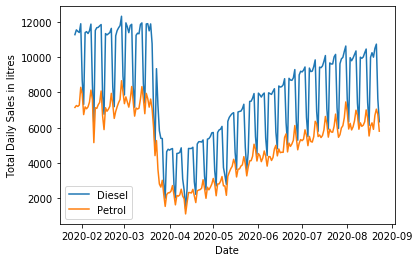

In [13]:

import matplotlib.pyplot as plt
# diesel_df.plot(x ='Date', y='Total', kind = 'line')

fig = plt.figure()

plt.plot(diesel_df['Date'], diesel_df['Total'], label='Diesel')
plt.plot(petrol_df['Date'], petrol_df['Total'], label='Petrol')

plt.xlabel('Date')
plt.ylabel('Total Daily Sales in litres')
plt.legend()


plt.show()


Plotting the same graph as above but with vertical lines to highlight key UK Covid events

<Figure size 432x288 with 0 Axes>

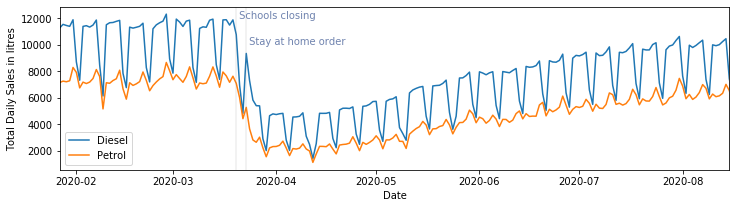

In [15]:
import matplotlib.pyplot as plt
import datetime
# diesel_df.plot(x ='Date', y='Total', kind = 'line')

fig = plt.figure()
ax1 = plt.subplots(figsize=(12,3))

plt.plot(diesel_df['Date'], diesel_df['Total'], label='Diesel')
plt.plot(petrol_df['Date'], petrol_df['Total'], label='Petrol')
# add a line for schools closing
school_close = pd.to_datetime('2020-03-20')
plt.axvline(x=school_close, color='grey', linestyle='-', linewidth=0.2)
plt.text(x=school_close, y= 12000, s=' Schools closing', alpha=0.7, color='#334f8d')
# add a line for stay at home order
stay_at_home = pd.to_datetime('2020-03-23')
plt.axvline(x=stay_at_home, color='grey', linestyle='-', linewidth=0.2)
plt.text(x=stay_at_home, y= 10000, s=' Stay at home order', alpha=0.7, color='#334f8d')

plt.xlabel('Date')
plt.ylabel('Total Daily Sales in litres')
plt.legend()

plt.xlim([datetime.date(2020, 1, 27), datetime.date(2020, 8, 15)])
plt.show()


Now include the Oxford Stringeny index. First, we check the dataframe and realise we only need UK data.

In [16]:
oxford_stringency_df['Date']= pd.to_datetime(oxford_stringency_df['Date'], format='%Y%m%d')
oxford_uk_df = oxford_stringency_df[oxford_stringency_df['CountryCode'] == 'GBR']
oxford_uk_noregion_df = oxford_uk_df[oxford_uk_df['RegionName'].isnull()]

Plot Oxford Stringency Index for UK, add comments with important events. Source: https://www.health.org.uk/news-and-comment/charts-and-infographics/covid-19-policy-tracker


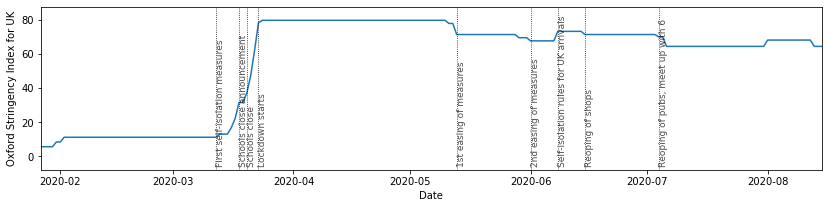

In [17]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,3))
ax.set_xlabel('Date')
ax.set_ylabel('Oxford Stringency Index for UK')
ax.plot(oxford_uk_noregion_df['Date'], oxford_uk_noregion_df['StringencyIndex'])
# change range 
ax.set_xlim([datetime.date(2020, 1, 27), datetime.date(2020, 8, 15)])
# add vertical lines for important lockdown events
# self isolation order
self_iso = pd.to_datetime('2020-03-12')
plt.axvline(x=self_iso, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=self_iso, y= -5, s='First self-isolation measures', alpha=0.7, color='black', rotation=90, fontsize= 9)
# school closure announced
school_close_announce = pd.to_datetime('2020-03-18')
plt.axvline(x=school_close_announce, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=school_close_announce, y= -5, s='Schools close announcement', alpha=0.7, color='black', rotation=90, fontsize= 9)
# schools closing
school_close = pd.to_datetime('2020-03-20')
plt.axvline(x=school_close, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=school_close, y= -5, s='Schools close', alpha=0.7, color='black', rotation=90, fontsize= 9)
# stay at home order
home = pd.to_datetime('2020-03-23')
plt.axvline(x=home, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=home, y= -5, s='Lockdown starts', alpha=0.7, color='black', rotation=90, fontsize= 9)
# 1st easing of lockdown measures: 
ease_1 = pd.to_datetime('2020-05-13')
plt.axvline(x=ease_1, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=ease_1, y= -5, s='1st easing of measures', alpha=0.7, color='black', rotation=90, fontsize= 9)     
# 2nd easing of lockdown measures: 
ease_2 = pd.to_datetime('2020-06-01')
plt.axvline(x=ease_2, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=ease_2, y= -5, s='2nd easing of measures', alpha=0.7, color='black', rotation=90, fontsize= 9)  
# new rules for entering UK
rules_1 = pd.to_datetime('2020-06-08')
plt.axvline(x=rules_1, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=rules_1, y= -5, s='Self-isolation rules for UK arrivals', alpha=0.7, color='black', rotation=90, fontsize= 9)  
# 3rd easing of lockdown measures: 
ease_3 = pd.to_datetime('2020-06-15')
plt.axvline(x=ease_3, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=ease_3, y= -5, s='Reoping of shops', alpha=0.7, color='black', rotation=90, fontsize= 9)   
# 4rd easing of lockdown measures, pubs to reopen in England: 
ease_4 = pd.to_datetime('2020-07-04')
plt.axvline(x=ease_4, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=ease_4, y= -5, s='Reoping of pubs, meet up with 6', alpha=0.7, color='black', rotation=90, fontsize= 9)   


    
ax.margins(0.1)
plt.show()




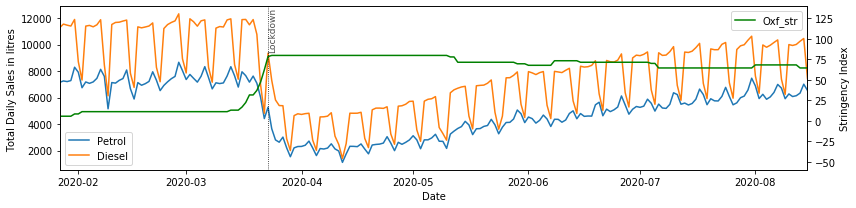

In [18]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,3))

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Daily Sales in litres ')
ax1.plot(petrol_df['Date'], petrol_df['Total'], label='Petrol')
ax1.plot(diesel_df['Date'], diesel_df['Total'], label='Diesel')
plt.legend()


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Stringency Index')  # we already handled the x-label with ax1
ax2.plot(oxford_uk_noregion_df['Date'], oxford_uk_noregion_df['StringencyIndex'], label ='Oxf_str', color='green')
plt.legend()
ax2.margins(0, 0.75) 

# add stay at home order and fist easing of measures
# stay at home order
home = pd.to_datetime('2020-03-23')
plt.axvline(x=home, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=home, y= 86, s='Lockdown', alpha=0.7, color='black', rotation=90, fontsize= 9)



plt.tight_layout()
ax1.set_xlim([datetime.date(2020, 1, 27), datetime.date(2020, 8, 15)])
plt.show()


By plotting diesel and petrol sales in the UK against the Oxford Stringency index, it becomes clear that the lockdown measures led to a decrease in demand. Demand fell to an all-time low on the weekend of the 11th and 12th of April. Despite measures not substantially easing, demand for diesel and petrol after that weekend start to increase steadily. This corresponds to the pattern of an increase in mobility found in both Google's and Apple's Mobility Data from mid April onwards (see below). 

In [19]:
apple_mob_df = pd.read_sql('SELECT * FROM applemobilitytrends_raw', con=engine)

In [20]:
apple_mob_uk = apple_mob_df[apple_mob_df['region'] == 'United Kingdom']
apple_mob_uk = apple_mob_uk.iloc[:,7:]
transpose_df = apple_mob_uk.transpose()
transpose_df.rename(columns={143:'driving', 144:'transit', 145:'walking'}, inplace=True)
transpose_df.index = pd.to_datetime(transpose_df.index)
transpose_df.head()

,driving,transit,walking
2020-01-13,100.00,100.00,100.00
2020-01-14,104.86,104.20,106.14
2020-01-15,106.40,105.37,114.37
2020-01-16,104.28,103.89,112.59
2020-01-17,109.27,109.38,128.99


<Figure size 432x288 with 0 Axes>

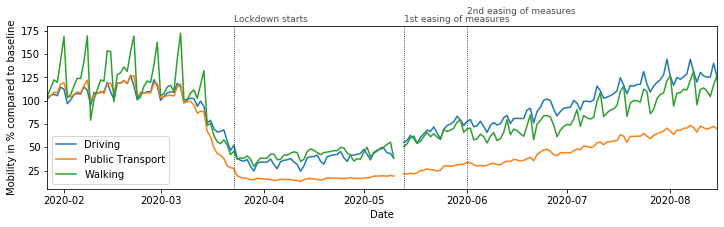

<Figure size 864x216 with 0 Axes>

In [21]:
# plot apple mobility data for UK

import matplotlib.pyplot as plt
import datetime


fig = plt.figure()
ax1 = plt.subplots(figsize=(12,3))

plt.plot(transpose_df.index, transpose_df['driving'], label='Driving')
plt.plot(transpose_df.index, transpose_df['transit'], label='Public Transport')
plt.plot(transpose_df.index, transpose_df['walking'], label='Walking')
plt.xlabel('Date')
plt.ylabel('Mobility in % compared to baseline')
plt.legend()
# stay at home order
home = pd.to_datetime('2020-03-23')
plt.axvline(x=home, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=home, y= 185, s='Lockdown starts', alpha=0.7, color='black', fontsize= 9)
# 1st easing of lockdown measures: 
ease_1 = pd.to_datetime('2020-05-13')
plt.axvline(x=ease_1, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=ease_1, y= 185, s='1st easing of measures', alpha=0.7, color='black', fontsize= 9)     
# 2nd easing of lockdown measures: 
ease_2 = pd.to_datetime('2020-06-01')
plt.axvline(x=ease_2, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=ease_2, y= 193, s='2nd easing of measures', alpha=0.7, color='black', fontsize= 9)  


plt.xlim([datetime.date(2020, 1, 27), datetime.date(2020, 8, 15)])

plt.figure(figsize=(12,3))



plt.show()

Apple's mobility data highlights that already on the weekend of the 14th and 15th of March 2020, people's mobility decreased compared to the weekends before. Since government policies to combat COVID-19 properly started the week after, one could argue that people reduced their mobility without government mandates. This might be because of the prominence of COVID-19 in the news, making people reconsider meeting with friends and to avoid crowded places. Related to avoiding crowded places, one effect of the pandemic is the decrease in usage of public transport. Work from home orders might play a role here, reducing the need to commute to work with public transport. 

This decrease in public transport usage could be reflected in the fact that the volume of driving from July onwards tends to be higher than the baseline volume on 13 January 2020. 

In [22]:
# get google mobility data from database
google_mob_df = pd.read_sql('SELECT * FROM Google_Global_Mobility_Report_raw', con=engine)
google_mob_df.head()

,index,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,AE,United Arab Emirates,None,None,None,None,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,1,AE,United Arab Emirates,None,None,None,None,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,2,AE,United Arab Emirates,None,None,None,None,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,3,AE,United Arab Emirates,None,None,None,None,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,4,AE,United Arab Emirates,None,None,None,None,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [40]:
import datetime
google_mob_uk_df = google_mob_df[google_mob_df['country_region'] == 'United Kingdom']
google_mob_uk_df = google_mob_uk_df[google_mob_uk_df['sub_region_1'].isnull()]
# check if data column is in datetime format
type(google_mob_uk_df['date'][850033])
# change string to date with datetime
google_mob_uk_df['date']= pd.to_datetime(google_mob_uk_df['date'], format='%Y-%m-%d')
type(google_mob_uk_df['date'][850033])



pandas._libs.tslibs.timestamps.Timestamp

<Figure size 432x288 with 0 Axes>

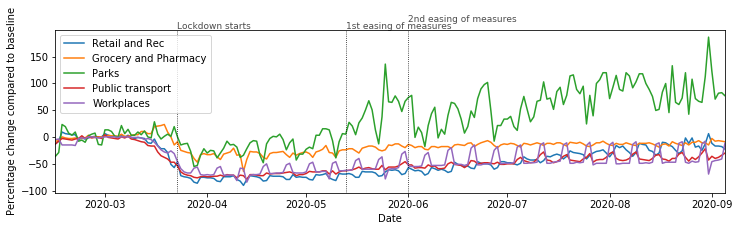

<Figure size 1224x504 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
import datetime


fig = plt.figure()
ax1 = plt.subplots(figsize=(12,3))

plt.plot(google_mob_uk_df['date'], google_mob_uk_df['retail_and_recreation_percent_change_from_baseline'], label='Retail and Rec')
plt.plot(google_mob_uk_df['date'], google_mob_uk_df['grocery_and_pharmacy_percent_change_from_baseline'], label='Grocery and Pharmacy')
plt.plot(google_mob_uk_df['date'], google_mob_uk_df['parks_percent_change_from_baseline'], label='Parks')
plt.plot(google_mob_uk_df['date'], google_mob_uk_df['transit_stations_percent_change_from_baseline'], label='Public transport') 
plt.plot(google_mob_uk_df['date'], google_mob_uk_df['workplaces_percent_change_from_baseline'], label='Workplaces')                         
plt.xlabel('Date')
plt.ylabel('Percentage change compared to baseline')
plt.legend()
# stay at home order
home = pd.to_datetime('2020-03-23')
plt.axvline(x=home, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=home, y= 202, s='Lockdown starts', alpha=0.7, color='black', fontsize= 9)
# 1st easing of lockdown measures: 
ease_1 = pd.to_datetime('2020-05-13')
plt.axvline(x=ease_1, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=ease_1, y= 202, s='1st easing of measures', alpha=0.7, color='black', fontsize= 9)     
# 2nd easing of lockdown measures: 
ease_2 = pd.to_datetime('2020-06-01')
plt.axvline(x=ease_2, color='black', linestyle='dotted', linewidth=0.8)
plt.text(x=ease_2, y= 215, s='2nd easing of measures', alpha=0.7, color='black', fontsize= 9)  


plt.xlim([datetime.date(2020, 2, 15), datetime.date(2020, 9, 5)])

plt.figure(figsize=(17,7))



plt.show()

Google mobility data shows that lockdown led to large decrease in workplace visits compared to the baseline, which in Google's case is "the median value for the corresponding day of the week, during the 5-week period Jan 3–Feb 6, 2020" (https://www.google.com/covid19/mobility/data_documentation.html?hl=en). Even before lockdown started, the British governement's advice was to work from home, explaining the decrease from mid March onwards. 
In addition to less frequent visits to workplaces, the Google mobility data shows people's habits also changed in other aspects. Because of the lockdown rules, retail shops as well as recreational sites, such as gyms and cinema, had to shut, removing the option to e.g. go to the gym from people's lifes. From April onwards, parks have seen more visits than compard to January and February 2020. However, this might also be related to the fact that the weather from April onwards was better than in January and February, making visits to the park more attractive to the public. 
Further, just like the Apple Mobility data, the Google mobility data shows that people tend to avoid public transport even since the beginning of the pandemic. 